In [17]:
import numpy as np
import matplotlib.pyplot as plt

# interpolar 
Se refiere a "unir puntos mediante una función"

# Interpolación lineal

Es el método mas sencillo de aproximar una función $$ f(x)=y $$esto por medio de una linea recta para cada par de puntos.

$$ y = y_i + \frac{y_{i+1} - y_i}{x_{i+1} - x_i}(x-x_i) $$

In [8]:
#------------------- Interpolación lineal ----------------------------
import numpy as np
import matplotlib.pyplot as plt

def Interpolacion_lineal(xi,yi, n=10):
   ''' Interpolación lineal, esta función toma 2 arrays.
       y grafica la interpolacion usando 5 puntos.'''

   for i in range(len(xi)-1):
      # dividimos el intervalo i,i+1 en n pedasos
      x = np.linspace(xi[i], xi[i+1], n, endpoint=False) # no usar el último punto

      # funcion que hace interpolacion lineal en i,i+1
      f = lambda x: yi[i]+(yi[i+1]-yi[i])/(xi[i+1]-xi[i])*(x-xi[i])

      # array con los puntos interpolados en el intervalo i,i+1
      y = np.array([ f(xk) for xk in x ]) # xk son los valores de x en i,i+1

      plt.plot(x,y,".", ms=1)  # grificar los 5 datos x,f(x) interpolados

   plt.grid()
   plt.show()

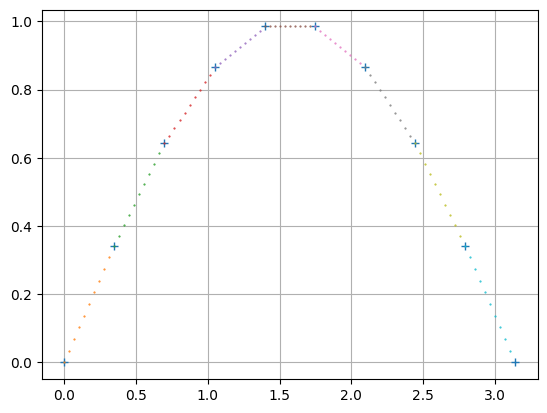

In [9]:
# datos a interpolar, en este caso se generan por la función seno:
xi = np.linspace(0,np.pi,10)# 20 datos tomados en (0,pi)
yi = np.sin(xi)
plt.plot(xi,yi,'+')         # graficar los puntos a interpolar
Interpolacion_lineal(xi,yi) # llamamos la función que es evaluada n
                            # veces entre cada par de puntos

# Método de Lagrange

En este método se utilizan aproximaciones polinomiales, las cuales funcionan para un intervalo, no solo para puntos particulares:
$$ P(x) = \sum_{k=0}^{n}f(x_k)L_k(x) $$

para cada $ k = 0,1,...,n$ y

$$ L_k(x) = \prod_{i=0 \\ i \neq k}^{n} \frac{(x-x_i)}{(x_k - x_i)} $$

Note que $ i \neq k$

<div class="alert alert-danger">
    Primero encontramos el polinomio de lagrange con la función P_n, luego lo utilizamos en en la función Interpolación_Lagrange
</div>

In [1]:
#--------------- Polinomio  de Lagrange metodo 1 -------------------------
import numpy as np
import matplotlib.pyplot as plt


def P_n(xi,yi,x):
    '''
     *** P_n(x): polinomio de grado n evaluado en x ***
    Función del polinomio de lagrange (forma
    intuitiva de programación a partir de la definición).
    '''

    n = len(xi)          # grado del polinomio
    S = 0.0              # inicialización sumatoria
    for k in range(n):   # Sumatoria del polinomio en n+1 elementos
        # Forma intuitiva a partir de la fórmula
        L = 1
        for i in range(n):
            if i != k:
                L = L*(x-xi[i])/(xi[k]-xi[i])

        S  = S + yi[k]*L

    return S


**Ejemplo 2)** en el ejemplo 1) encontramos analíticamente que, $f(x)=\sqrt{x} \approx −0.11438\,x^2 + 0.75736\,x + 0.35702 $, al interpolar en puntos $ x_i = (1/2, 1, 2)$ y $y_i =(1/\sqrt{2}, 1, \sqrt{2})$, verifiquemos con `sympy` que la rutina anterior recupera este polinomio:


In [2]:
import sympy as sp
sp.init_printing(use_latex='mathjax') # para imprimir de manera bonita (latex)
x=sp.Symbol('x')                      # crear variable simbolica
#xi=[sp.Rational(1,2),1,2]
#yi=[1/sp.sqrt(2),1,sp.sqrt(2)]
xi=[1/2,1,2]
yi=[1/np.sqrt(2),1,np.sqrt(2)]
sp.expand(P_n(xi,yi,x))
#P_n(xi,yi,x)

                     2                                          
- 0.114381916835873⋅x  + 0.757359312880715⋅x + 0.357022603955158

In [3]:
#-------------------- Interpolación de Lagrange --------------------------
# Se hace una segunda función que llama P_n interpola
def Interpolacion_Lagrange(xi,yi,eps):
   ''' Esta funcion toma n+1 pares (xi,yi) de datos y los interpola
       en intervalo (x0,xn) usando el metodo de lagrange.'''

   n = len(xi)-1 # el array tiene n+1 elementos.
   print ("El grado del Pn(x) es:",n)

   x = np.arange(xi[0],xi[n], eps)  # Valores a interpolar
   P = np.array([P_n(xi,yi,xk) for xk in x]) # Polinomio P(x) de grado n evaluado en x

   plt.plot(x,P,label="Lagrange")       # Graficar interpolación de lagrange.
   plt.legend()
   plt.show()

El grado del Pn(x) es: 4


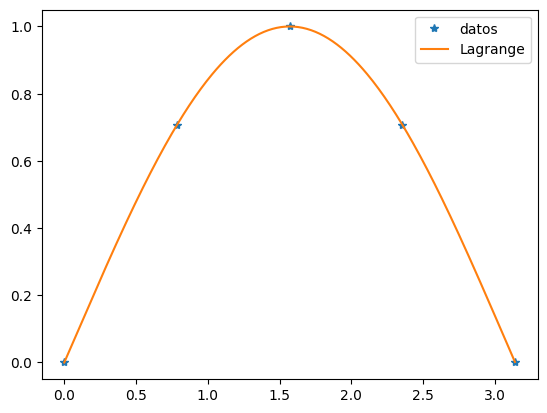

In [6]:
# ejemplo 3
xi = np.linspace(0,np.pi,5)# 5 datos tomados en (0,pi).
yi = np.sin(xi)            # 5 datos tomados de la función seno.
plt.plot(xi,yi,'*',label='datos')  # graficar los puntos a interpolar

Interpolacion_Lagrange(xi,yi, 0.01) # llamamos la función

In [8]:
x = sp.Symbol('x') # crear variable simbolica
f = sp.expand(P_n(xi,yi,x))
f
# Si desea solo 3 cifras significativas habilite estas lineas:
#d = {n : round(n,3) for n in f.atoms(sp.Number)} # diccionario con remplazos
#f.xreplace(d)                                    # imprima con menos cifras

                    4                      3                       2           ↪
0.0375757673118033⋅x  - 0.236095509079522⋅x  + 0.0582877134742557⋅x  + 0.98196 ↪

↪             
↪ 8385299078⋅x

Tarea taller:
1. 50 o 40 datos Graficar todos los posibles errores promedios
2. Llevar lineal y lagrange a una aplicación física a la ecuación de kepler, encontrando el periodo de la orbita, encontrar el tiempo cuando se repite la grafica, es decir cuando  
 